<a href="https://colab.research.google.com/github/Nandi-123/Assignment1-Basic-Statistics_Level-1/blob/main/Normal_Distribution_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [9]:
BEML=pd.read_csv('/content/BEML.csv')
BEML[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [10]:
GLAXO=pd.read_csv('/content/GLAXO.csv')
GLAXO[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [11]:
BEML=BEML[['Date','Close']]
GLAXO=GLAXO[['Date','Close']]

In [12]:
BEML

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [13]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
BEML=BEML.set_index(pd.DatetimeIndex(BEML['Date']))
GLAXO=GLAXO.set_index(pd.DatetimeIndex(GLAXO['Date']))

Text(0, 0.5, 'Close Price')

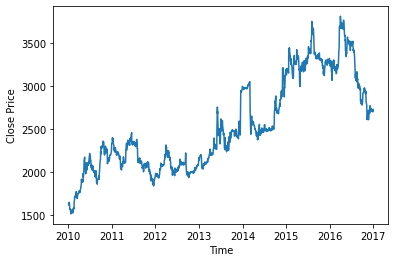

In [14]:
plt.plot(GLAXO.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

Text(0, 0.5, 'Close Price')

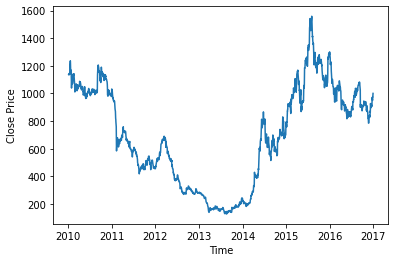

In [15]:
plt.plot(BEML.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

In [16]:
GLAXO['gain']=GLAXO.Close.pct_change(periods=1)
BEML['gain']=BEML.Close.pct_change(periods=1)

In [18]:
#To remove NA values in the first row
GLAXO=GLAXO.dropna()
BEML=BEML.dropna()

Text(0, 0.5, 'gain')

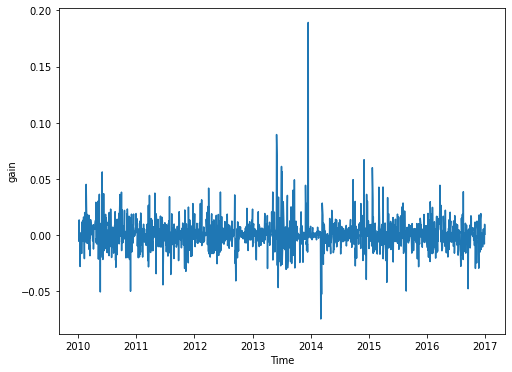

In [19]:
#Plot the gains
plt.figure(figsize=(8,6))
plt.plot(GLAXO.index,GLAXO.gain)
plt.xlabel('Time')
plt.ylabel('gain')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


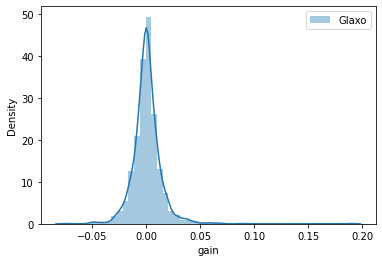

In [21]:
sns.distplot(GLAXO.gain,label='Glaxo')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


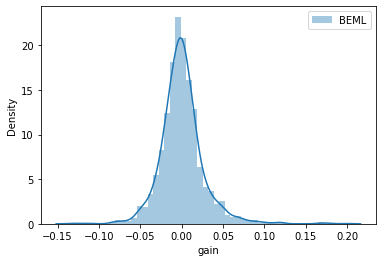

In [22]:
sns.distplot(BEML.gain,label='BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

In [23]:
print('Mean:',round(GLAXO.gain.mean(),4))
print('Standard Deviation:', round(GLAXO.gain.std(),4))

Mean: 0.0004
Standard Deviation: 0.0134


In [24]:
print('Mean:',round(BEML.gain.mean(),4))
print('Standard Deviation:', round(BEML.gain.std(),4))

Mean: 0.0003
Standard Deviation: 0.0264


In [25]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf(-0.02,loc=GLAXO.gain.mean(),scale=GLAXO.gain.std())

0.06352488667177397

In [26]:
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf(-0.02,loc=BEML.gain.mean(),scale=BEML.gain.std())

0.22155987503755292

In [27]:
#Probability of making 2% gain or higher in Glaxo
1-stats.norm.cdf(-0.02,loc=GLAXO.gain.mean(),scale=GLAXO.gain.std())

0.9364751133282261

In [28]:
#Probability of making 2% gain or higher in BEML
1-stats.norm.cdf(-0.02,loc=BEML.gain.mean(),scale=BEML.gain.std())

0.7784401249624471